In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


In [138]:
Data = pd.read_csv('Top23.csv')
Data.reset_index(drop=True, inplace=True)
Data=pd.DataFrame(Data)
datetime_series = pd.to_datetime(Data['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Data=Data.set_index(datetime_index)
Data.drop('Date',axis=1,inplace=True)
Data.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,125.93,132.19,126.97,144.87,102.16,116.12,16.6996,112.33,2.5811,3.3174,...,107.58,1.203,1087.01,114.97,116.80,1.5310,146.87,30.00,1.804,108.6293
2020-01-17,127.36,134.08,130.35,150.74,105.57,122.95,17.8299,113.34,2.5511,3.2784,...,107.90,1.245,1109.94,119.10,126.55,1.5898,146.98,31.95,1.936,113.7443
2020-01-24,127.36,134.08,130.35,150.74,105.57,122.95,17.8168,113.34,2.5484,3.2766,...,107.90,1.245,1109.94,119.10,126.91,1.5879,146.93,32.28,1.865,113.6851
2020-01-31,128.51,135.13,131.34,152.17,106.59,124.81,17.6950,113.66,2.5424,3.2758,...,108.09,1.246,1114.02,119.35,126.97,1.5753,146.91,31.98,1.857,112.6737
2020-02-10,134.85,139.35,133.97,156.04,109.34,126.30,18.8113,113.03,2.6935,3.4563,...,108.22,1.241,1119.46,121.95,126.94,1.5832,149.48,32.92,2.144,115.9955


In [139]:
# Log of percentage change of all stocks in the list
Ret= Data.pct_change().apply(lambda x: np.log(1+x)) # CONVERT TO RETURN
Ret.head()

,PFGDAAU LX Equity,PFTEAAU LX Equity,PFCSAAU LX Equity,PFARAAU LX Equity,PFBKAAU LX Equity,PFGOAAU LX Equity,AIBALMA AB Equity,LODFUIA LX Equity,CCASORI MK Equity,CCASLTF MK Equity,...,GMFDEBI LE Equity,PGPGIFA ID Equity,BLUESPH BM Equity,PFGLAAU LX Equity,ALPCRDA LX Equity,ALCONGP AB Equity,UBSFLBI LX Equity,BUTIBLI KY Equity,PGPCBFA ID Equity,SCHGTRA LX Equity
2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17,0.011292,0.014196,0.026272,0.039720,0.032834,0.057154,0.065492,0.008951,-0.011691,-0.011826,...,0.002970,0.034317,0.020875,0.035292,0.080174,0.037687,0.000749,0.062975,0.070618,0.046012
2020-01-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000735,0.000000,-0.001059,-0.000549,...,0.000000,0.000000,0.000000,0.000000,0.002841,-0.001196,-0.000340,0.010276,-0.037363,-0.000521
2020-01-31,0.008989,0.007801,0.007566,0.009442,0.009615,0.015015,-0.006860,0.002819,-0.002357,-0.000244,...,0.001759,0.000803,0.003669,0.002097,0.000473,-0.007967,-0.000136,-0.009337,-0.004299,-0.008936
2020-02-10,0.048156,0.030751,0.019827,0.025114,0.025473,0.011867,0.061176,-0.005558,0.057733,0.053637,...,0.001202,-0.004021,0.004871,0.021551,-0.000236,0.005002,0.017342,0.028970,0.143711,0.029055


In [140]:
Ann_Ret = Ret.mean()*52
print (Ann_Ret)

PFGDAAU LX Equity    0.193103
PFTEAAU LX Equity    0.148640
PFCSAAU LX Equity    0.142347
PFARAAU LX Equity    0.137116
PFBKAAU LX Equity    0.129976
PFGOAAU LX Equity    0.128215
AIBALMA AB Equity    0.156728
LODFUIA LX Equity    0.019267
CCASORI MK Equity    0.073103
CCASLTF MK Equity    0.071160
BBFTOP3 KY Equity    0.055968
CRLCBUU LX Equity    0.045205
BCUSDLF KK Equity    0.006239
GMFDEBI LE Equity    0.011142
PGPGIFA ID Equity    0.057633
BLUESPH BM Equity    0.048089
PFGLAAU LX Equity    0.082974
ALPCRDA LX Equity    0.085297
ALCONGP AB Equity    0.049993
UBSFLBI LX Equity    0.019595
BUTIBLI KY Equity    0.128367
PGPCBFA ID Equity    0.169876
SCHGTRA LX Equity    0.086125
dtype: float64


In [141]:
Ann_Risk=Data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(52))
print(Ann_Risk)

PFGDAAU LX Equity    0.461536
PFTEAAU LX Equity    0.351670
PFCSAAU LX Equity    0.344130
PFARAAU LX Equity    0.300020
PFBKAAU LX Equity    0.319491
PFGOAAU LX Equity    0.206006
AIBALMA AB Equity    0.358585
LODFUIA LX Equity    0.047346
CCASORI MK Equity    0.149778
CCASLTF MK Equity    0.150888
BBFTOP3 KY Equity    0.134146
CRLCBUU LX Equity    0.105749
BCUSDLF KK Equity    0.018949
GMFDEBI LE Equity    0.025829
PGPGIFA ID Equity    0.130852
BLUESPH BM Equity    0.108423
PFGLAAU LX Equity    0.179658
ALPCRDA LX Equity    0.202564
ALCONGP AB Equity    0.140207
UBSFLBI LX Equity    0.066625
BUTIBLI KY Equity    0.316568
PGPCBFA ID Equity    0.561228
SCHGTRA LX Equity    0.229263
dtype: float64


In [142]:
Ret_Covar = Ret.cov()
#print(Ret_Covar)



In [143]:
# Yearly returns for individual companies
ind_er = Data.resample('Y').last().pct_change().mean()
ind_er

PFGDAAU LX Equity    0.145453
PFTEAAU LX Equity    0.121749
PFCSAAU LX Equity    0.109440
PFARAAU LX Equity    0.100191
PFBKAAU LX Equity    0.092993
PFGOAAU LX Equity    0.078892
AIBALMA AB Equity    0.076369
LODFUIA LX Equity    0.013253
CCASORI MK Equity    0.038140
CCASLTF MK Equity    0.038412
BBFTOP3 KY Equity    0.040926
CRLCBUU LX Equity    0.022385
BCUSDLF KK Equity    0.002768
GMFDEBI LE Equity    0.006226
PGPGIFA ID Equity    0.021034
BLUESPH BM Equity    0.014902
PFGLAAU LX Equity    0.038815
ALPCRDA LX Equity    0.019602
ALCONGP AB Equity    0.017065
UBSFLBI LX Equity    0.004839
BUTIBLI KY Equity    0.049820
PGPCBFA ID Equity    0.023058
SCHGTRA LX Equity    0.021886
dtype: float64

In [144]:
Ret_Corr = Ret.corr()
print(Ret_Corr)

                   PFGDAAU LX Equity  PFTEAAU LX Equity  PFCSAAU LX Equity  \
PFGDAAU LX Equity           1.000000           0.976507           0.975180   
PFTEAAU LX Equity           0.976507           1.000000           0.988000   
PFCSAAU LX Equity           0.975180           0.988000           1.000000   
PFARAAU LX Equity           0.956746           0.973505           0.982332   
PFBKAAU LX Equity           0.951147           0.965256           0.983394   
PFGOAAU LX Equity           0.839002           0.796494           0.817094   
AIBALMA AB Equity           0.768661           0.755111           0.758259   
LODFUIA LX Equity           0.853979           0.893262           0.878139   
CCASORI MK Equity           0.771158           0.739361           0.732078   
CCASLTF MK Equity           0.792896           0.763242           0.756682   
BBFTOP3 KY Equity           0.888475           0.910394           0.875706   
CRLCBUU LX Equity           0.837409           0.810919         

In [145]:
# Log of percentage change and creeate Covariance matrix
cov_matrix = Data.pct_change().apply(lambda x: np.log(1+x)).cov()
#cov_matrix


In [146]:
Data.columns


Index(['PFGDAAU LX Equity', 'PFTEAAU LX Equity', 'PFCSAAU LX Equity',
       'PFARAAU LX Equity', 'PFBKAAU LX Equity', 'PFGOAAU LX Equity',
       'AIBALMA AB Equity', 'LODFUIA LX Equity', 'CCASORI MK Equity',
       'CCASLTF MK Equity', 'BBFTOP3 KY Equity', 'CRLCBUU LX Equity',
       'BCUSDLF KK Equity', 'GMFDEBI LE Equity', 'PGPGIFA ID Equity',
       'BLUESPH BM Equity', 'PFGLAAU LX Equity', 'ALPCRDA LX Equity',
       'ALCONGP AB Equity', 'UBSFLBI LX Equity', 'BUTIBLI KY Equity',
       'PGPCBFA ID Equity', 'SCHGTRA LX Equity'],
      dtype='object')

In [147]:
Ret_risk=(Ann_Ret/Ann_Risk)
print(Ret_risk)

PFGDAAU LX Equity    0.418393
PFTEAAU LX Equity    0.422668
PFCSAAU LX Equity    0.413642
PFARAAU LX Equity    0.457024
PFBKAAU LX Equity    0.406822
PFGOAAU LX Equity    0.622384
AIBALMA AB Equity    0.437074
LODFUIA LX Equity    0.406933
CCASORI MK Equity    0.488074
CCASLTF MK Equity    0.471607
BBFTOP3 KY Equity    0.417221
CRLCBUU LX Equity    0.427479
BCUSDLF KK Equity    0.329251
GMFDEBI LE Equity    0.431382
PGPGIFA ID Equity    0.440441
BLUESPH BM Equity    0.443528
PFGLAAU LX Equity    0.461845
ALPCRDA LX Equity    0.421087
ALCONGP AB Equity    0.356569
UBSFLBI LX Equity    0.294106
BUTIBLI KY Equity    0.405497
PGPCBFA ID Equity    0.302686
SCHGTRA LX Equity    0.375661
dtype: float64


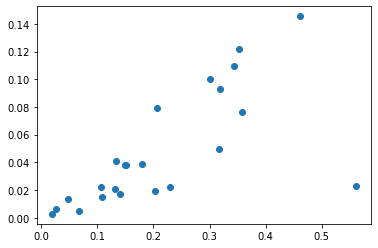

In [148]:
x=Ann_Risk
y=ind_er
plt.scatter(x,y)
plt.show()

In [149]:
assets = pd.concat([Ann_Ret,Ann_Risk,Ret_risk], axis=1)
assets.columns = ['Ann Returns', 'Ann Risk', 'Return Risk Ratio']
assets

,Ann Returns,Ann Risk,Return Risk Ratio
PFGDAAU LX Equity,0.193103,0.461536,0.418393
PFTEAAU LX Equity,0.148640,0.351670,0.422668
PFCSAAU LX Equity,0.142347,0.344130,0.413642
PFARAAU LX Equity,0.137116,0.300020,0.457024
PFBKAAU LX Equity,0.129976,0.319491,0.406822
PFGOAAU LX Equity,0.128215,0.206006,0.622384
AIBALMA AB Equity,0.156728,0.358585,0.437074
LODFUIA LX Equity,0.019267,0.047346,0.406933
CCASORI MK Equity,0.073103,0.149778,0.488074
CCASLTF MK Equity,0.071160,0.150888,0.471607


<AxesSubplot:>

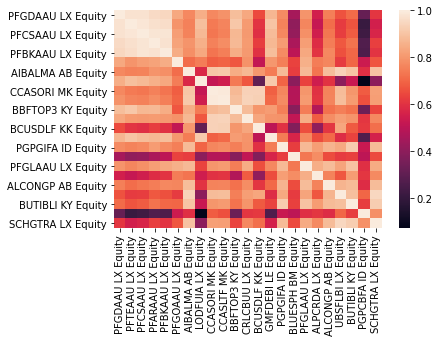

In [150]:
sb.heatmap(Ret_Corr)

In [151]:
w = [0.043]*23
#w = {'PFGDAAU LX Equity':0.043, 'PFTEAAU LX Equity':0.043, 'PFCSAAU LX Equity':0.043, 'PFARAAU LX Equity':0.043, 'PFBKAAU LX Equity':0.043, 'PFGOAAU LX Equity':0.043, 'AIBALMA AB Equity':0.043, 'LODFUIA LX Equity':0.043, 'CCASORI MK Equity':0.043, 'CCASLTF MK Equity':0.043, 'BBFTOP3 KY Equity':0.043, 'CRLCBUU LX Equity':0.043, 'BCUSDLF KK Equity':0.043, 'GMFDEBI LE Equity':0.043,'PGPGIFA ID Equity':0.043, 'BLUESPH BM Equity':0.043, 'PFGLAAU LX Equity':0.043, 'ALPCRDA LX Equity':0.043, 'ALCONGP AB Equity':0.043, 'UBSFLBI LX Equity':0.043, 'BUTIBLI KY Equity':0.043, 'PGPCBFA ID Equity':0.043, 'SCHGTRA LX Equity':0.043} 
port_var = Ret_Covar.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*52)**(0.5)
print (port_var)
print (port_var*52)

0.0006243666465517862
0.03246706562069288


In [152]:
Ann_port_std

0.18018619708704905

In [153]:
w = [0.043]*23
port_er = (w*Ann_Ret).sum()
port_er

0.0879848249850896

In [154]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(Data.columns)
num_portfolios = 5000

In [155]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,Ann_Ret) 
    p_ret.append(returns)
    var = Ret_Covar.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
    sd = np.sqrt(var) #Daily standard deviation
    ann_sd = sd*np.sqrt(52) #Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [156]:
data = {'Returns':p_ret, 'Risk':p_vol}
for counter, symbol in enumerate(Data.columns.tolist()):
#print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Risk,PFGDAAU LX Equity weight,PFTEAAU LX Equity weight,PFCSAAU LX Equity weight,PFARAAU LX Equity weight,PFBKAAU LX Equity weight,PFGOAAU LX Equity weight,AIBALMA AB Equity weight,LODFUIA LX Equity weight,...,GMFDEBI LE Equity weight,PGPGIFA ID Equity weight,BLUESPH BM Equity weight,PFGLAAU LX Equity weight,ALPCRDA LX Equity weight,ALCONGP AB Equity weight,UBSFLBI LX Equity weight,BUTIBLI KY Equity weight,PGPCBFA ID Equity weight,SCHGTRA LX Equity weight
0,0.088610,0.186670,0.075364,0.030975,0.031716,0.007832,0.019010,0.030259,0.068782,0.017863,...,0.072963,0.077410,0.015292,0.055250,0.048170,0.070917,0.029744,0.078094,0.007415,0.069988
1,0.084406,0.176223,0.040488,0.038825,0.073985,0.059130,0.047780,0.023229,0.047088,0.062096,...,0.052531,0.051479,0.062563,0.036075,0.028914,0.065192,0.039255,0.035254,0.008381,0.024550
2,0.092764,0.190298,0.049222,0.029656,0.028046,0.031376,0.039845,0.058713,0.044334,0.000221,...,0.055065,0.055714,0.033048,0.067369,0.026783,0.030868,0.031138,0.067333,0.051283,0.070040
3,0.091297,0.191155,0.032769,0.061040,0.059760,0.008163,0.084771,0.035723,0.070547,0.052186,...,0.022886,0.030145,0.035802,0.047594,0.046228,0.062231,0.063306,0.041670,0.015170,0.045015
4,0.081975,0.162354,0.024814,0.018015,0.021171,0.057244,0.005607,0.076957,0.070781,0.043095,...,0.073838,0.061028,0.040682,0.082958,0.048534,0.019163,0.022339,0.014097,0.039618,0.027281


<AxesSubplot:xlabel='Risk', ylabel='Returns'>

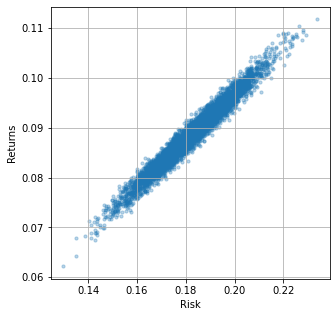

In [157]:
portfolios.plot.scatter(x='Risk', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

In [158]:
min_vol_port = portfolios.iloc[portfolios['Risk'].idxmin()]
# idxmin() gives us the minimum value in the column specified.
min_vol_port

Returns                     0.062162
Risk                        0.129774
PFGDAAU LX Equity weight    0.005697
PFTEAAU LX Equity weight    0.036820
PFCSAAU LX Equity weight    0.002114
PFARAAU LX Equity weight    0.042779
PFBKAAU LX Equity weight    0.026226
PFGOAAU LX Equity weight    0.019387
AIBALMA AB Equity weight    0.006895
LODFUIA LX Equity weight    0.083342
CCASORI MK Equity weight    0.028778
CCASLTF MK Equity weight    0.046504
BBFTOP3 KY Equity weight    0.050170
CRLCBUU LX Equity weight    0.081118
BCUSDLF KK Equity weight    0.088077
GMFDEBI LE Equity weight    0.098823
PGPGIFA ID Equity weight    0.064127
BLUESPH BM Equity weight    0.023082
PFGLAAU LX Equity weight    0.067525
ALPCRDA LX Equity weight    0.001182
ALCONGP AB Equity weight    0.048072
UBSFLBI LX Equity weight    0.047879
BUTIBLI KY Equity weight    0.016931
PGPCBFA ID Equity weight    0.016955
SCHGTRA LX Equity weight    0.097517
Name: 4445, dtype: float64

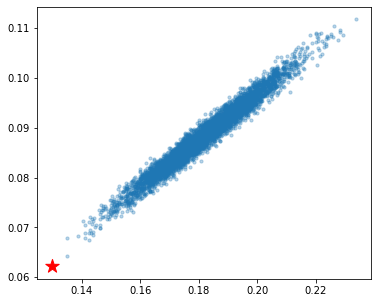

In [159]:
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=200)

In [160]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risk']).idxmax()]
optimal_risky_port

Returns                     0.104227
Risk                        0.206660
PFGDAAU LX Equity weight    0.023312
PFTEAAU LX Equity weight    0.063296
PFCSAAU LX Equity weight    0.088081
PFARAAU LX Equity weight    0.083441
PFBKAAU LX Equity weight    0.025768
PFGOAAU LX Equity weight    0.098456
AIBALMA AB Equity weight    0.082997
LODFUIA LX Equity weight    0.070677
CCASORI MK Equity weight    0.010723
CCASLTF MK Equity weight    0.030822
BBFTOP3 KY Equity weight    0.037728
CRLCBUU LX Equity weight    0.016744
BCUSDLF KK Equity weight    0.004922
GMFDEBI LE Equity weight    0.004369
PGPGIFA ID Equity weight    0.025464
BLUESPH BM Equity weight    0.063241
PFGLAAU LX Equity weight    0.020597
ALPCRDA LX Equity weight    0.087286
ALCONGP AB Equity weight    0.028873
UBSFLBI LX Equity weight    0.026684
BUTIBLI KY Equity weight    0.006051
PGPCBFA ID Equity weight    0.059838
SCHGTRA LX Equity weight    0.040629
Name: 3551, dtype: float64

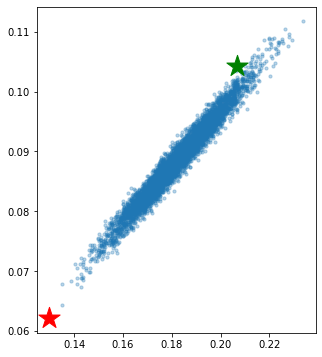

In [161]:
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Risk'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [135]:
Ret_Corr.to_csv(r'Correlation Matrix .csv')

PermissionError: [Errno 13] Permission denied: 'Correlation Matrix .csv'

In [136]:
Data.to_csv(r'Dataset.csv')